# Big Project description

In [4]:
# Remember to install the below packages if not already done on your IDE (compiler)
# pip install pandas matplotlib seaborn

In [5]:
# I first need to import the standard libraries I will be using
import pandas as pd  # For converting csv data to dataframe and work with pandas
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For visualizations
from datetime import datetime  # For working with dates

In [6]:
# now I can load my CSV file using Pandas
df_sunshinedata = pd.read_csv('mtm03-sunshine-with-long-lat.csv')

# display the data to see if pulled through correctly
print("A preview of the dataset is shown below: ")
display(df_sunshinedata)

A preview of the dataset is shown below: 


,STATISTIC,Statistic Label,Month,month_date,Meteorological Weather Station,UNIT,VALUE,latitude,longitude
0,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Belmullet,Number,43.7,54.226,-9.992
1,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Birr,Number,64.6,53.095,-7.902
2,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Valentia Observatory,Number,46.8,51.936,-10.244
3,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Casement,Number,NaN,53.307,-6.447
4,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Claremorris,Number,51.6,53.719,-9.006
...,...,...,...,...,...,...,...,...,...
23395,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Malin head,Number,NaN,55.385,-7.378
23396,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Mullingar,Number,NaN,53.525,-7.340
23397,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Roches Point,Number,NaN,51.785,-8.252
23398,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Rosslare,Number,NaN,52.261,-6.331


In [7]:
# Basic data
# now I want to check some basic data regarding the dataset
print("\nColumn Names and Data Types:")
print(df_sunshinedata.dtypes) # check the value types contained

print("\nBasic Statistics:")
print(df_sunshinedata.describe()) # check for basic statistics on the data contained

print("\nMissing Values:")
print(df_sunshinedata.isnull().sum()) # check for the number of missing values in the total of 23399 rows of data. I will have to remove missing data later that it does not distort my plots



Column Names and Data Types:
STATISTIC                          object
Statistic Label                    object
Month                              object
month_date                         object
Meteorological Weather Station     object
UNIT                               object
VALUE                             float64
latitude                          float64
longitude                         float64
dtype: object

Basic Statistics:
              VALUE      latitude     longitude
count  18651.000000  23400.000000  23400.000000
mean      60.753381     53.153400     -8.008267
std       63.678586      0.970647      1.223480
min        0.000000     51.785000    -10.244000
25%        9.800000     52.261000     -9.006000
50%       16.000000     53.270000     -7.902000
75%      106.600000     53.719000     -7.234000
max      301.000000     55.385000     -6.270000

Missing Values:
STATISTIC                            0
Statistic Label                      0
Month                           

In [8]:
# Unique values in columns
# I want to check how many unique values can be found in key columns of the dataset
print("\nUnique weather stations contained in this dataset are:")
print(df_sunshinedata['Meteorological Weather Station'].unique())

print("\nUnique data points contained in this dataset are:")
print(df_sunshinedata['Statistic Label'].unique()) # two labels of data found


Unique weather stations contained in this dataset are:
['Belmullet' 'Birr' 'Valentia Observatory' 'Casement' 'Claremorris'
 'Clones' 'Cork airport' 'Dublin airport' 'Galway' 'Kilkenny' 'Malin head'
 'Mullingar' 'Roches Point' 'Rosslare' 'Shannon airport']

Unique data points contained in this dataset are:
['Total Sunshine Hours' 'Most Sunshine Hours in a Day']


In [9]:
# Remove blanks from data & convert applicable to datetime
# now I need to clean the data or remove rows with NA or blank values
df_sunshinedata = df_sunshinedata.dropna(subset=['VALUE']) # remove rows with no values
print(f"\nRows after removing missing values: {len(df_sunshinedata)}") # check nr of rows remove with above calculation
# 23400 rows total - 4749 rows with missing data = 18651 and this is correct

# change the month_date column into a datetime format
df_sunshinedata["month_date"] = pd.to_datetime(df_sunshinedata["month_date"])
# I will now add new columns to split the year, month and add a name for that month
df_sunshinedata['Year'] = df_sunshinedata['month_date'].dt.year # create new column for year
df_sunshinedata['Month_Num'] = df_sunshinedata['month_date'].dt.month # create new column for month number
df_sunshinedata['Month_Name'] = df_sunshinedata['month_date'].dt.month_name() # create new column for month name 

# Rename VALUE column to be more descriptive
df_sunshinedata = df_sunshinedata.rename(columns={'VALUE': 'Sunshine_Hours'})

display(df_sunshinedata)


Rows after removing missing values: 18651


,STATISTIC,Statistic Label,Month,month_date,Meteorological Weather Station,UNIT,Sunshine_Hours,latitude,longitude,Year,Month_Num,Month_Name
0,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Belmullet,Number,43.7,54.226,-9.992,1958,1,January
1,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Birr,Number,64.6,53.095,-7.902,1958,1,January
2,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Valentia Observatory,Number,46.8,51.936,-10.244,1958,1,January
4,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Claremorris,Number,51.6,53.719,-9.006,1958,1,January
5,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Clones,Number,53.8,54.195,-7.234,1958,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
23384,MTM03C2,Most Sunshine Hours in a Day,2022M11,2022-11-01,Shannon airport,Number,6.3,52.684,-8.925,2022,11,November
23388,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Casement,Number,6.2,53.307,-6.447,2022,12,December
23391,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Cork airport,Number,7.0,51.841,-8.491,2022,12,December
23392,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Dublin airport,Number,6.7,53.421,-6.270,2022,12,December


In [10]:
# Previously I saw two data points of info tabelled downward. Now I want to split these
df_totalsunshinehrs = df_sunshinedata[df_sunshinedata['Statistic Label'] == 'Total Sunshine Hours'] # filter by the info in Statistic Label column I want
print('Dataset for Total Sunshine Hours: ')
display(df_totalsunshinehrs) # show the seperate dataset

df_maxsunshinehrs_perday = df_sunshinedata[df_sunshinedata['Statistic Label'] == 'Most Sunshine Hours in a Day'] # filter by the info in Statistic Label column I want
print('Dataset for Most Sunshine Hours in a Day: ')
display(df_maxsunshinehrs_perday) # show the seperate dataset

Dataset for Total Sunshine Hours: 


,STATISTIC,Statistic Label,Month,month_date,Meteorological Weather Station,UNIT,Sunshine_Hours,latitude,longitude,Year,Month_Num,Month_Name
0,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Belmullet,Number,43.70,54.226,-9.992,1958,1,January
1,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Birr,Number,64.60,53.095,-7.902,1958,1,January
2,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Valentia Observatory,Number,46.80,51.936,-10.244,1958,1,January
4,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Claremorris,Number,51.60,53.719,-9.006,1958,1,January
5,MTM03C1,Total Sunshine Hours,1958M01,1958-01-01,Clones,Number,53.80,54.195,-7.234,1958,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
11684,MTM03C1,Total Sunshine Hours,2022M11,2022-11-01,Shannon airport,Number,71.70,52.684,-8.925,2022,11,November
11688,MTM03C1,Total Sunshine Hours,2022M12,2022-12-01,Casement,Number,68.51,53.307,-6.447,2022,12,December
11691,MTM03C1,Total Sunshine Hours,2022M12,2022-12-01,Cork airport,Number,78.74,51.841,-8.491,2022,12,December
11692,MTM03C1,Total Sunshine Hours,2022M12,2022-12-01,Dublin airport,Number,76.26,53.421,-6.270,2022,12,December


Dataset for Most Sunshine Hours in a Day: 


,STATISTIC,Statistic Label,Month,month_date,Meteorological Weather Station,UNIT,Sunshine_Hours,latitude,longitude,Year,Month_Num,Month_Name
11700,MTM03C2,Most Sunshine Hours in a Day,1958M01,1958-01-01,Belmullet,Number,5.9,54.226,-9.992,1958,1,January
11701,MTM03C2,Most Sunshine Hours in a Day,1958M01,1958-01-01,Birr,Number,7.0,53.095,-7.902,1958,1,January
11702,MTM03C2,Most Sunshine Hours in a Day,1958M01,1958-01-01,Valentia Observatory,Number,6.2,51.936,-10.244,1958,1,January
11704,MTM03C2,Most Sunshine Hours in a Day,1958M01,1958-01-01,Claremorris,Number,5.7,53.719,-9.006,1958,1,January
11705,MTM03C2,Most Sunshine Hours in a Day,1958M01,1958-01-01,Clones,Number,6.3,54.195,-7.234,1958,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...
23384,MTM03C2,Most Sunshine Hours in a Day,2022M11,2022-11-01,Shannon airport,Number,6.3,52.684,-8.925,2022,11,November
23388,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Casement,Number,6.2,53.307,-6.447,2022,12,December
23391,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Cork airport,Number,7.0,51.841,-8.491,2022,12,December
23392,MTM03C2,Most Sunshine Hours in a Day,2022M12,2022-12-01,Dublin airport,Number,6.7,53.421,-6.270,2022,12,December



 Sunshine hours range per weather station per month:


,Mean_hours,Median_hours,Min_hours,Max_hours,Std_dev
Meteorological Weather Station,,,,,
Rosslare,134.25,134.20,10.5,301.0,63.15
Dublin airport,121.59,119.80,16.4,295.1,53.95
Roches Point,120.13,116.50,18.9,271.6,56.78
Cork airport,118.89,116.70,0.0,264.4,55.53
Casement,114.85,111.60,22.3,293.6,52.77
Galway,112.18,110.50,0.0,268.5,53.05
Kilkenny,110.45,106.35,21.7,275.0,50.64
Mullingar,109.48,105.30,19.8,271.6,49.56
Shannon airport,109.43,104.60,19.5,255.1,51.75


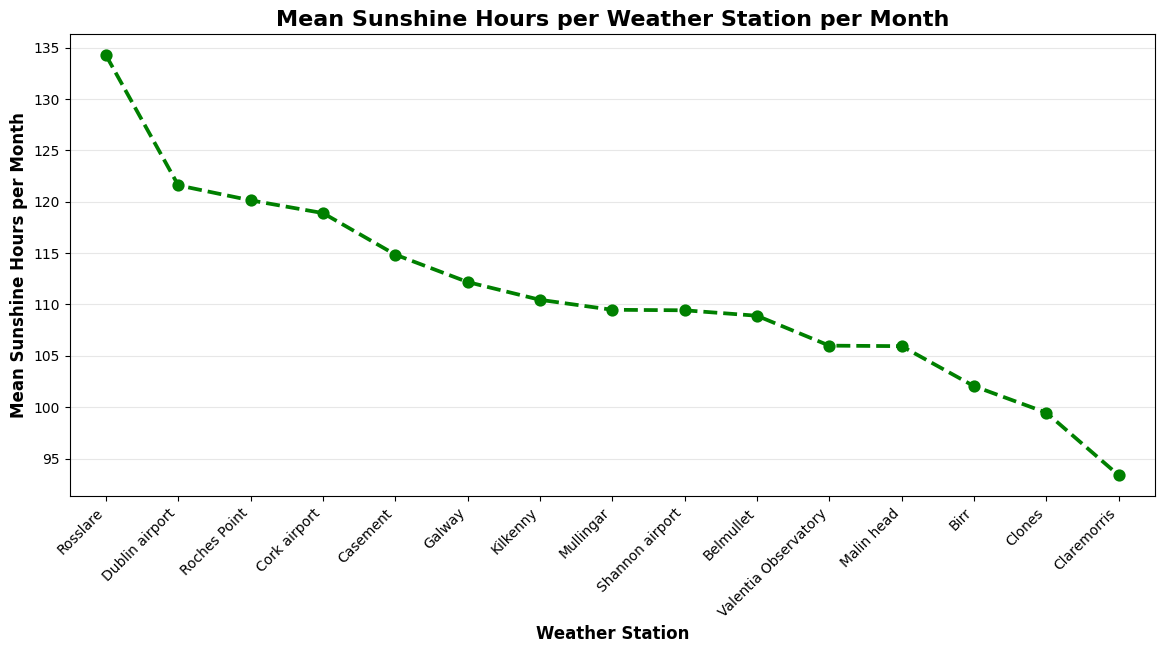

In [11]:
# Now I will calculate the average sunshine hours for each weather station
# use .groupby to group the data per wearther station
mean_by_station = df_totalsunshinehrs.groupby('Meteorological Weather Station')['Sunshine_Hours'].agg([
    ('Mean_hours', 'mean'), # calculate the mean
    ('Median_hours', 'median'), # calculate the median
    ('Min_hours', 'min'), # calculate the minimum value
    ('Max_hours', 'max'), # calculate the maximum value
    ('Std_dev', 'std'),]).round(2).sort_values('Mean_hours', ascending=False) # sort higest to lowest using mean hours and round figures to 2 decimals

print("\n Sunshine hours range per weather station per month:")
display(mean_by_station) # show table
# this gives us an insight which locations have more sunlight hours than others

# Plot this data using seaborn
# reset the index to make 'Meteorological Weather Station' a column for plotting
mean_by_station_plot = mean_by_station.reset_index()
plt.figure(figsize=(14, 6)) # set size of plot
sns.pointplot( # use point plot
    data=mean_by_station_plot,
    x='Meteorological Weather Station', # set x values
    y='Mean_hours', # set y values
    color='green', # set color of line
    markers='o', # use markers to show data for point each station
    linestyles='--' # use dotted lines to connect the data
)

plt.xlabel('Weather Station', fontsize=12, fontweight='bold') # define label and make bold
plt.ylabel('Mean Sunshine Hours per Month', fontsize=12, fontweight='bold') # define label and make bold
plt.title('Mean Sunshine Hours per Weather Station per Month', fontsize=16, fontweight='bold') # define label and make bold
plt.xticks(rotation=45, ha='right') # rotate the x axis text to make easier to read and fit in space
plt.grid(axis='y', alpha=0.3) # make a grid to easier see value levels on y axis
plt.show() # show plot


 Sunshine hours range per month (across all stations):

 1 = January, 12 = December


,Mean_hours,Median_hours,Min_hours,Max_hours,Std_dev
Month_Num,,,,,
1,51.62,50.80,0.0,118.4,17.36
2,68.62,65.50,0.0,199.4,21.28
3,103.34,102.05,0.0,203.1,27.80
4,152.71,152.10,69.0,246.3,30.79
5,184.56,181.50,84.9,295.1,37.94
6,165.94,160.85,68.9,301.0,41.16
7,147.74,143.45,58.7,289.5,40.72
8,147.43,143.20,58.8,280.5,35.42
9,118.58,116.10,54.1,219.5,24.79


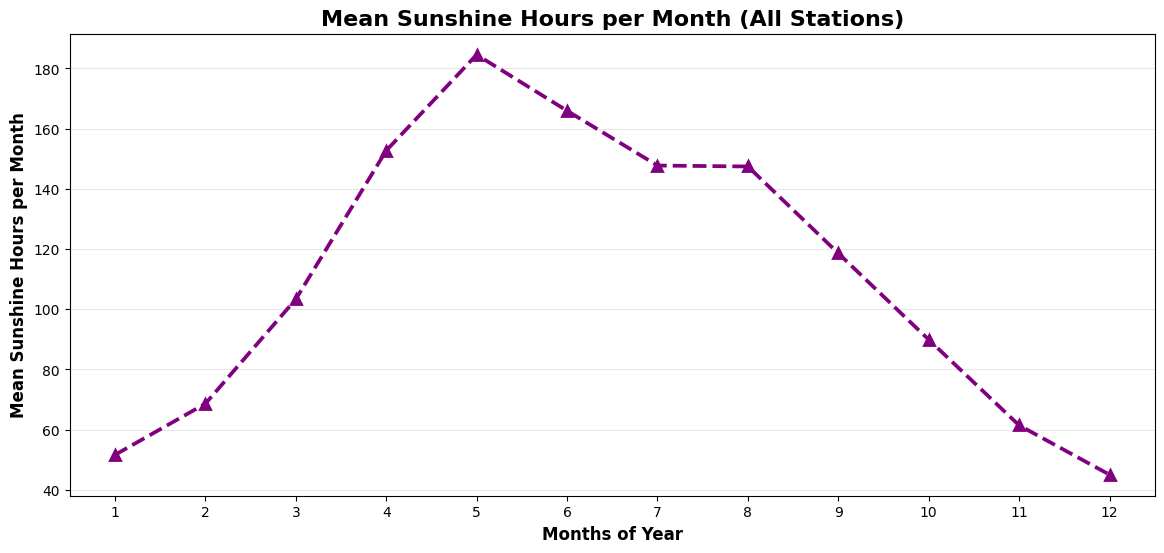

In [12]:
# Now I will calculate the average sunshine hours for each month
# use .groupby to group the data per month number
mean_by_month = df_totalsunshinehrs.groupby('Month_Num')['Sunshine_Hours'].agg([
    ('Mean_hours', 'mean'), # calculate the mean
    ('Median_hours', 'median'), # calculate the median
    ('Min_hours', 'min'), # calculate the minimum value
    ('Max_hours', 'max'), # calculate the maximum value
    ('Std_dev', 'std'),]).round(2) # round figures to 2 decimals

print("\n Sunshine hours range per month (across all stations):")
print("\n 1 = January, 12 = December")
display(mean_by_month) # show table
# this gives us an insight which months have more sunlight hours than others

# Plot this data using seaborn
# reset the index to make 'Month_Num' a column for plotting
mean_by_month_plot = mean_by_month.reset_index()
plt.figure(figsize=(14, 6)) # set size of plot
sns.pointplot( # use point plot
    data=mean_by_month_plot,
    x='Month_Num', # set x values
    y='Mean_hours', # set y values
    color='purple', # set color of line
    markers='^', # use markers to show data for point each station
    linestyles='--' # use dotted lines to connect the data
)

plt.xlabel('Months of Year', fontsize=12, fontweight='bold') # define label and make bold
plt.ylabel('Mean Sunshine Hours per Month', fontsize=12, fontweight='bold') # define label and make bold
plt.title('Mean Sunshine Hours per Month (All Stations)', fontsize=16, fontweight='bold') # define label and make bold
# plt.xticks(rotation=45, ha='right') # not required on this plot
plt.grid(axis='y', alpha=0.3) # make a grid to easier see value levels on y axis
plt.show() # show plot


 Sunshine hours range per year (across all stations):

 Sorted from high to low according to mean hours per year


,Mean_hours,Median_hours,Min_hours,Max_hours,Std_dev
Year,,,,,
1958,1213.98,1195.85,1024.8,1516.20,130.65
1959,1588.05,1575.50,1304.9,1996.40,181.28
1960,1472.22,1481.05,1238.0,1790.80,154.04
1961,1331.97,1336.55,1083.2,1625.20,150.97
1962,1434.18,1419.30,1249.6,1719.00,117.52
...,...,...,...,...,...
2018,1431.88,1488.40,1166.0,1584.70,187.04
2019,1190.95,1245.95,865.6,1406.30,250.54
2020,1503.80,1512.90,1412.8,1576.60,68.39


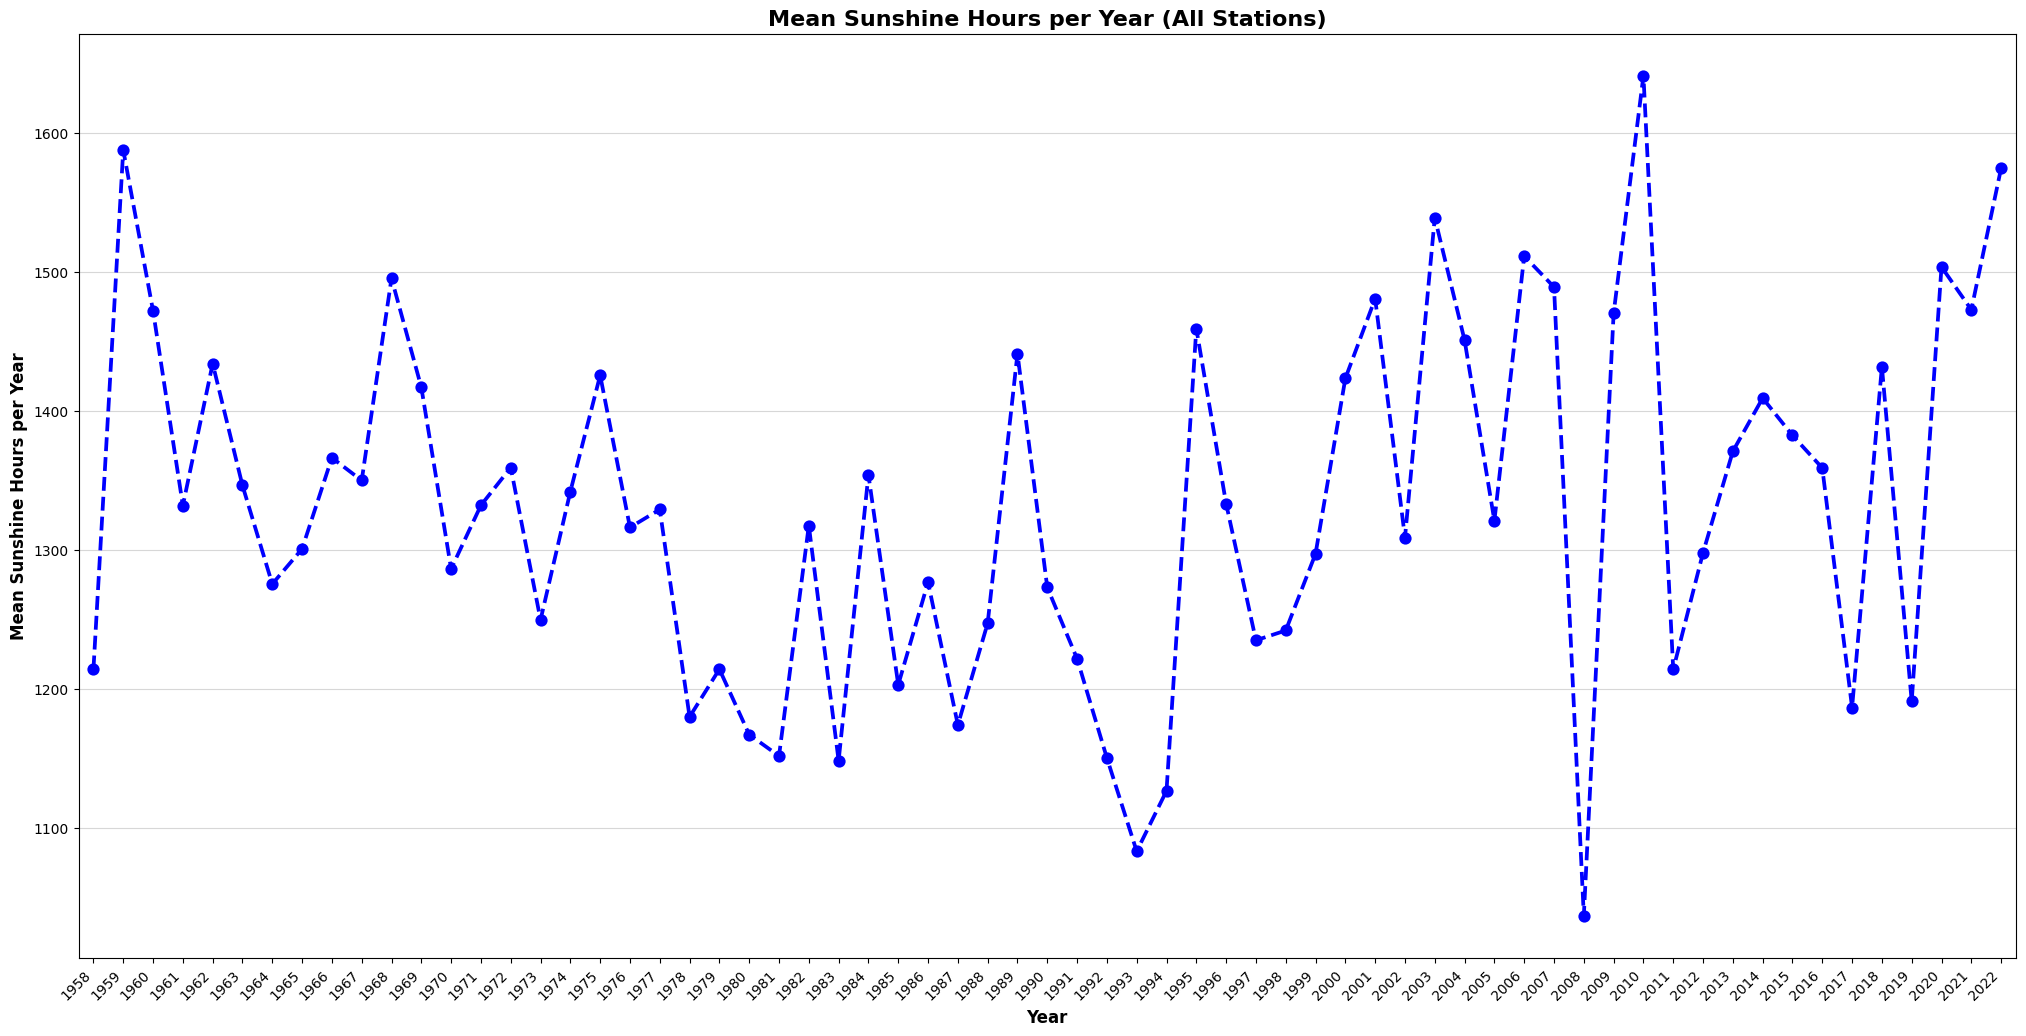

In [13]:
# Now I will calculate the average sunshine hours for each year
# As the data is per month I will have to convert this to get yearly aggregate
df_annual_totals = df_totalsunshinehrs.groupby(['Year', 'Meteorological Weather Station'])['Sunshine_Hours'].sum().reset_index() # sum all hours for all months of a given year
df_annual_totals = df_annual_totals.rename(columns={'Sunshine_Hours': 'Annual_Total_Hours'}) # rename sunshine hours to annual total hours to make more sense
# use .groupby to group the data per year number
mean_by_year = df_annual_totals.groupby('Year')['Annual_Total_Hours'].agg([
    ('Mean_hours', 'mean'), # calculate the mean
    ('Median_hours', 'median'), # calculate the median
    ('Min_hours', 'min'), # calculate the minimum value
    ('Max_hours', 'max'), # calculate the maximum value
    ('Std_dev', 'std'),]).round(2)  # round figures to 2 decimals

print("\n Sunshine hours range per year (across all stations):")
print("\n Sorted from high to low according to mean hours per year")
display(mean_by_year) # show table
# looks like a variation of almost 60% in the mean is possible from max to min year

# Plot this data using seaborn
# reset the index to make 'Year' a column for plotting
mean_by_year_plot = mean_by_year.reset_index()
plt.figure(figsize=(25, 12)) # set size of plot
sns.pointplot( # use point plot
    data=mean_by_year_plot,
    x='Year', # set x values
    y='Mean_hours', # set y values
    color='blue', # set color of line
    markers='o', # use markers to show data for point each station
    linestyles='--' # use dotted lines to connect the data
)

plt.xlabel('Year', fontsize=12, fontweight='bold') # define label and make bold
plt.ylabel('Mean Sunshine Hours per Year', fontsize=12, fontweight='bold') # define label and make bold
plt.title('Mean Sunshine Hours per Year (All Stations)', fontsize=16, fontweight='bold') # define label and make bold
plt.xticks(rotation=45, ha='right') # shift rotation of text for better display
plt.grid(axis='y', alpha=0.5) # make a grid to easier see value levels on y axis
plt.show() # show plot


 Month 1 = January, Month 12 = December


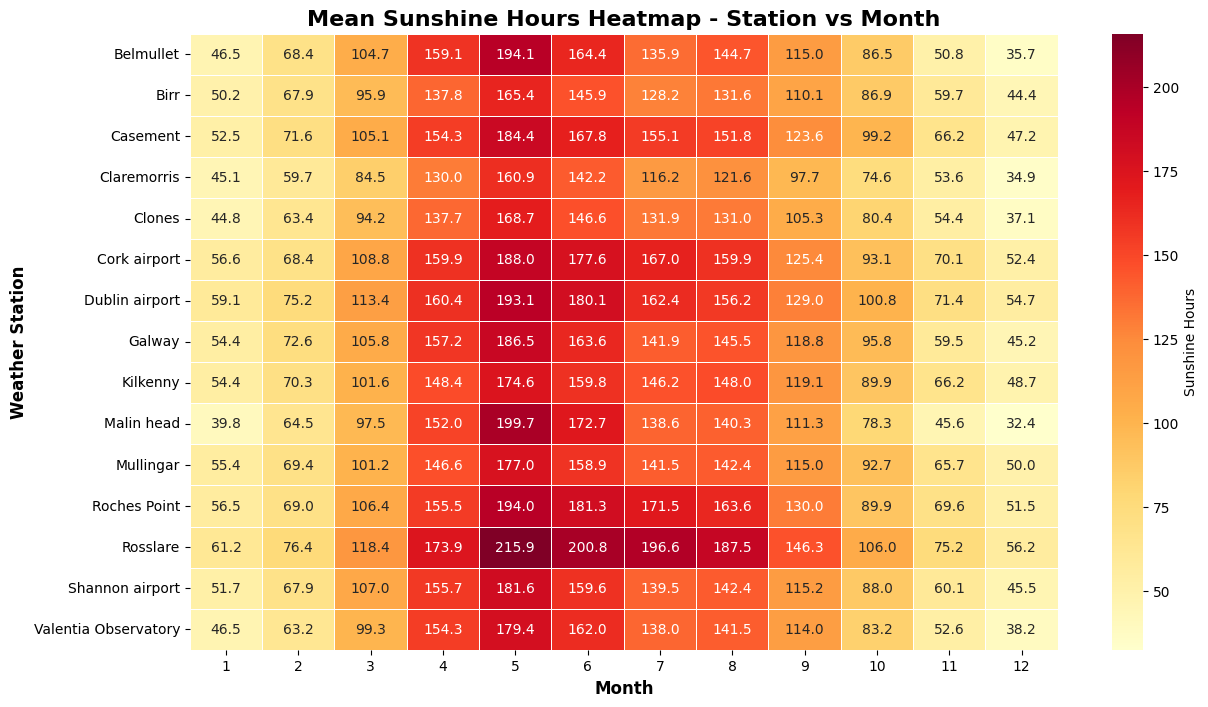

In [22]:
# Last semester I used a heatmap feuture in seaborn to display data. I think this will be very useful to illustrate the sunshine hours per station and month
# Heatmap of sunshine hours by station and month
plt.figure(figsize=(14, 8)) # set plot size

# use groupby to get consensed data for the heat map using station, month and sunshine hrs for that month
heatmap_data = df_totalsunshinehrs.groupby(['Meteorological Weather Station', 'Month_Num'])['Sunshine_Hours'].mean().unstack() # calculate mean and unstack moves data to a wider table format (more columns to right)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd',  #  use seaborn heatmap functionality
            cbar_kws={'label': 'Sunshine Hours'}, linewidths=0.5) # set labels, use yellow to red colormap
# use cbar_kws to add color legend for the sunshine hrs values from high to low
plt.xlabel('Month', fontsize=12, fontweight='bold') # set label and bold
plt.ylabel('Weather Station', fontsize=12, fontweight='bold')  # set label and bold
plt.title('Mean Sunshine Hours Heatmap - Station vs Month', fontsize=16, fontweight='bold') # set title and bold
print("\n Month 1 = January, Month 12 = December")
plt.show()